In [1]:
import time
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
# Reading files
data_path = r'./Dataset/data.csv'

data_df = pd.read_csv(data_path, index_col = "row_id")

In [8]:
data_df.head()

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
row_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,-0.500665,-1.416075,1.201521,0.551902,-0.759827,NaN,2,2,0,3,2,1,1,3,2,2,3,3,2,5,4,1,0,1,0,2,1,2,0,1,2,-0.240522,0.061529,0.561090,-0.171943,-0.431996,0.473508,0.596924,0.819306,1.479061,1.264616,-1.116881,0.759443,-0.086915,-0.620685,0.057216,1.076380,-0.780608,-1.940907,-0.717021,0.599093,0.498347,0.118770,-0.228913,NaN,0.301610,5.547214,1.066871,-0.134313,-0.101040,-0.660871,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,-0.363425,-0.853630,0.674525,0.843058,-0.041438,0.259496,3,5,2,1,4,2,3,2,0,0,9,3,1,4,1,2,1,0,1,1,1,1,3,2,5,-0.446068,1.433358,0.040099,-1.994062,-0.602324,-0.611391,-1.151884,0.065485,0.352023,-0.843751,1.167272,0.921445,-0.839827,0.759015,-1.547387,0.720435,-0.944045,1.796462,-1.046357,-0.581515,0.704543,0.375222,0.705963,0.032771,NaN,-1.707374,-1.188114,-0.562419,-1.462988,1.290672,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,0.595777,-0.073235,-1.381605,-0.108676,0.703693,-0.464042,3,2,1,3,2,1,0,6,1,1,3,4,1,2,2,1,2,2,4,8,1,5,1,2,4,-0.770592,0.483139,-0.636484,-1.305018,-2.089889,0.276761,-1.208640,-0.855769,0.232363,0.215841,-1.031405,0.582437,-0.314639,-0.497409,0.489356,0.915049,-0.513410,0.904206,-0.056089,0.212927,-0.574126,-1.517749,-0.888472,0.142264,1.000822,1.914908,3.877128,NaN,0.358635,0.443973,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,-2.217847,-0.618973,0.742112,0.494157,0.744673,-0.769181,2,3,2,1,1,1,2,0,6,2,6,2,1,1,2,3,1,2,1,2,6,2,1,0,2,-0.691020,-1.003026,0.868989,0.464920,NaN,0.499838,0.203723,-0.451576,-1.233499,0.903493,1.144558,-1.479893,-0.414316,0.024820,-0.976814,0.176633,-0.940022,-1.918049,1.506448,0.604388,0.578250,-0.122676,-0.711811,0.228523,0.999599,-2.638262,0.546676,0.865400,-0.857077,2.667105,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,-1.143500,1.338692,1.193330,1.038010,-0.763692,0.513466,5,0,1,3,3,0,2,5,1,3,5,5,4,4,2,0,2,3,2,5,2,2,1,0,4,1.196402,1.076537,0.486482,0.424305,0.475876,0.426978,-1.668823,-0.843056,1.008980,-0.704152,-0.894834,1.491608,-0.149938,1.256330,2.427308,0.878677,0.594314,0.380175,0.666499,-0.664403,1.276316,NaN,-1.276574,-0.768874,1.852815,-0.230342,-0.459019,1.128705,-0.748683,NaN,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [12]:
print("Input Data, there are {:,.0f} rows and {:,.0f} columns".format(data_df.shape[0], data_df.shape[1]))

Input Data, there are 1,000,000 rows and 80 columns


<AxesSubplot:ylabel='row_id'>

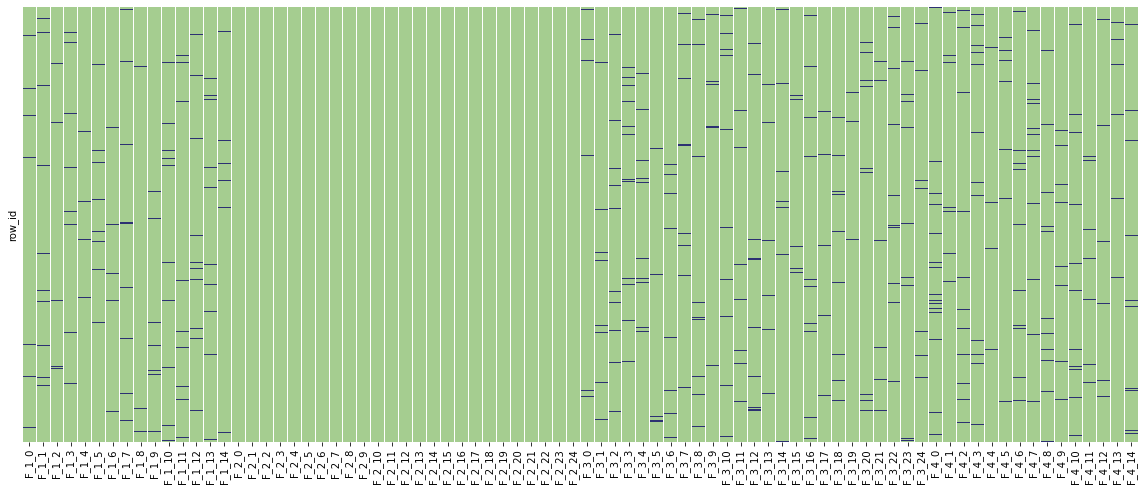

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(data_df.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [19]:
features = list(data_df.columns)
features_1, features_2, features_3, features_4 = [], [], [], []
F = [[], [], [], [], []]
for feature in features:
    for i in [1, 2, 3, 4]:
        if feature.split('_')[1] == str(i):
            F[i].append(feature)

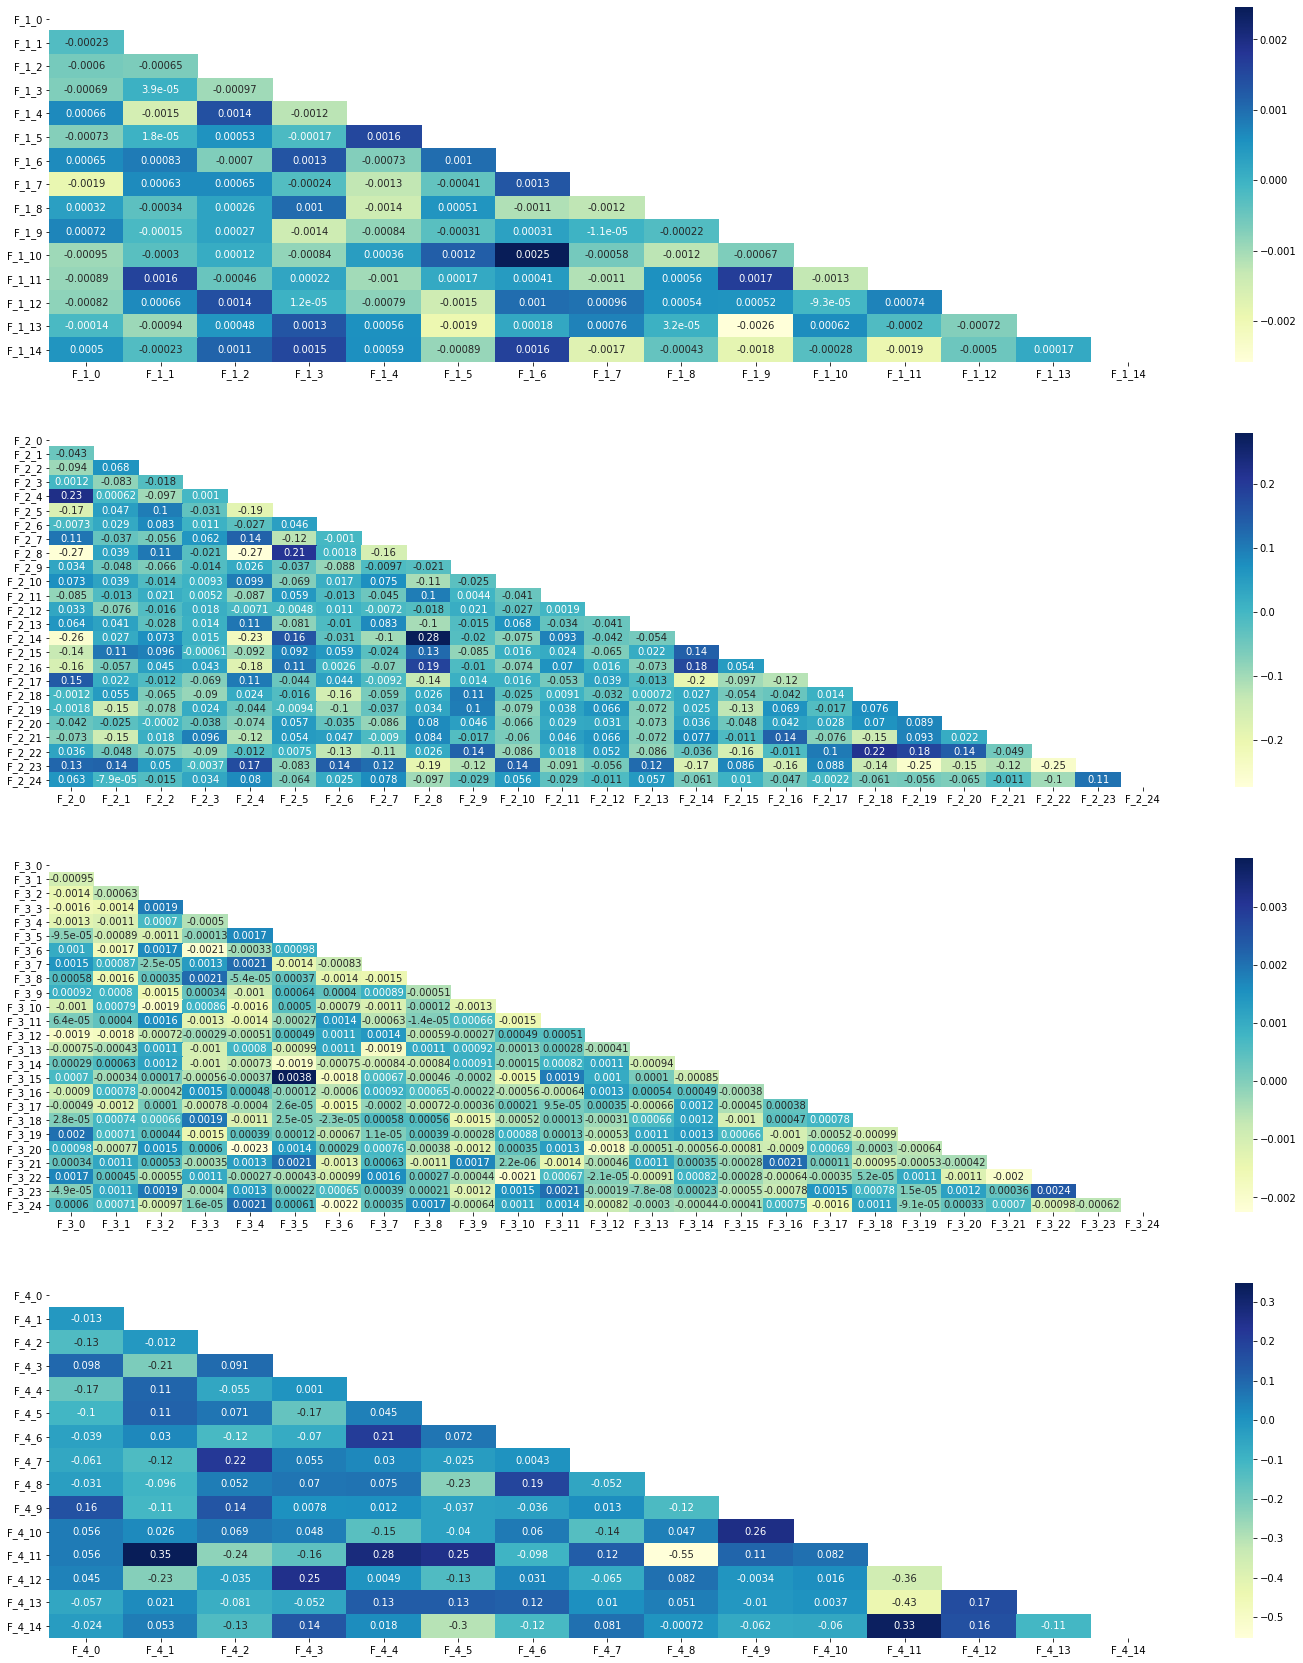

In [27]:
df = [[], [], [], [], []]

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(25, 30))

for i in [1, 2, 3, 4]:
    df[i] = data_df[F[i]]
    
    mask = np.triu(np.ones_like(df[i].corr()))
 
    dataplot = sns.heatmap(df[i].corr(), cmap="YlGnBu", annot=True, mask=mask, ax=axs[i-1])
    

In [15]:
df = data_df.describe()
df.style.format('{:,.3f}').background_gradient(subset=(df.index[1:],df.columns[:]), cmap='GnBu')

,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,F_1_9,F_1_10,F_1_11,F_1_12,F_1_13,F_1_14,F_2_0,F_2_1,F_2_2,F_2_3,F_2_4,F_2_5,F_2_6,F_2_7,F_2_8,F_2_9,F_2_10,F_2_11,F_2_12,F_2_13,F_2_14,F_2_15,F_2_16,F_2_17,F_2_18,F_2_19,F_2_20,F_2_21,F_2_22,F_2_23,F_2_24,F_3_0,F_3_1,F_3_2,F_3_3,F_3_4,F_3_5,F_3_6,F_3_7,F_3_8,F_3_9,F_3_10,F_3_11,F_3_12,F_3_13,F_3_14,F_3_15,F_3_16,F_3_17,F_3_18,F_3_19,F_3_20,F_3_21,F_3_22,F_3_23,F_3_24,F_4_0,F_4_1,F_4_2,F_4_3,F_4_4,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,"981,603.000","981,784.000","981,992.000","981,750.000","981,678.000","981,911.000","981,867.000","981,872.000","981,838.000","981,751.000","982,039.000","981,830.000","981,797.000","981,602.000","981,961.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","1,000,000.000","981,971.000","981,655.000","981,944.000","981,946.000","981,627.000","981,702.000","981,808.000","981,987.000","981,902.000","981,894.000","981,800.000","981,612.000","981,703.000","981,940.000","981,861.000","981,762.000","981,878.000","981,722.000","981,911.000","981,800.000","981,752.000","981,604.000","981,823.000","981,794.000","981,855.000","981,872.000","981,836.000","981,505.000","981,971.000","982,043.000","981,937.000","981,675.000","981,986.000","981,824.000","981,735.000","981,775.000","981,881.000","981,694.000","982,005.000","981,733.000"
mean,-0.001,0.002,0.001,0.001,0.002,0.001,-0.000,-0.064,-0.000,0.000,0.000,-0.001,-0.061,-0.067,-0.001,2.688,2.514,0.977,2.517,2.941,1.533,1.492,2.646,1.178,1.111,3.280,2.466,2.759,2.480,1.718,1.780,1.801,1.243,1.557,1.603,2.231,2.032,1.606,0.709,3.134,0.002,-0.001,0.001,0.001,0.001,-0.002,0.000,0.002,0.001,-0.000,0.002,0.001,0.000,-0.002,0.001,-0.002,-0.001,-0.000,0.000,-0.065,0.002,-0.059,0.000,0.000,-0.001,0.327,-0.331,-0.086,-0.195,0.333,0.336,0.004,0.334,-0.072,-0.080,0.038,0.552,0.334,0.330,0.037
std,1.001,1.000,1.000,1.000,1.001,1.000,1.000,0.726,1.001,1.000,0.999,1.000,0.712,0.746,1.000,1.875,1.751,1.038,1.653,1.977,1.351,1.316,1.745,1.319,1.096,1.872,1.600,1.705,1.646,1.557,1.459,1.459,1.246,1.445,1.421,1.561,1.609,1.555,1.079,1.821,1.001,1.000,0.999,1.000,1.000,1.000,0.999,1.001,1.001,1.002,1.000,0.999,1.000,1.000,0.999,1.000,1.000,1.000,1.000,0.739,0.999,0.697,0.999,1.000,1.000,2.322,2.406,0.837,0.821,2.374,2.353,2.292,2.359,0.778,0.807,0.707,4.997,2.383,2.364,0.776
min,-4.664,-4.791,-4.871,-5.053,-5.363,-5.508,-5.199,-6.990,-4.567,-4.998,-4.795,-4.612,-7.063,-6.896,-4.630,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-4.694,-4.466,-4.886,-4.677,-5.009,-4.871,-5.019,-5.053,-5.508,-4.846,-4.626,-4.598,-4.533,-4.747,-5.363,-4.448,-4.822,-4.806,-5.199,-6.069,-4.998,-7.147,-4.741,-5.251,-4.891,-12.878,-12.532,-9.663,-9.942,-12.825,-12.537,-11.132,-11.678,-10.092,-9.864,-10.354,-26.277,-11.524,-10.662,-9.984
25%,-0.675,-0.672,-0.674,-0.672,-0.672,-0.674,-0.675,-0.500,-0.674,-0.674,-0.674,-0.677,-0.489,-0.514,-0.676,1.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,2.000,1.000,2.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,2.000,-0.675,-0.675,-0.673,-0.674,-0.673,-0.676,-0.675,-0.673,-0.676,-0.675,-0.672,-0.675,-0.674,-0.676,-0.673,-0.675,-0.675,-0.675,-0.674,-0.507,-0.671,-0.480,-0.674,-0.674,-0.675,-1.168,-1.962,-0.608,-0.686,-1.191,-1.267,-1.571,-1.224,-0.518,-0.577,-0.386,-2.791,-1.269,-1.299,-0.396
50%,-0.001,0.002,0.001,0.000,0.003,0.000,0.001,0.001,-0.000,0.001,0.001,-0.001,0.001,-0.001,-0.000,2.000,2.000,1.000,2.000,3.000,1.000,1.000,2.000,1.000,1.000,3.000,2.000,3.000,2.000,1.000,2.000,2.000,1.000,1.000,1.000,2.0

In [31]:
missing_values_count = df[4].isnull().sum()
missing_values_count

F_4_0     18128
F_4_1     18164
F_4_2     18495
F_4_3     18029
F_4_4     17957
F_4_5     18063
F_4_6     18325
F_4_7     18014
F_4_8     18176
F_4_9     18265
F_4_10    18225
F_4_11    18119
F_4_12    18306
F_4_13    17995
F_4_14    18267
dtype: int64

In [33]:
%%time
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score
for i in [4]:
    dummy_df = pd.DataFrame()
    dummy_df2 = pd.DataFrame()
    col_train = pd.DataFrame()
    col_test = pd.DataFrame()
    dummy_df=df[i].copy()
    dummy_df2=df[i].copy()
    for column in dummy_df.columns: 
        print('Processing Colunm Name : ', column)
        if dummy_df[column].isnull().sum() == 0:
            print(dummy_df[column].isnull().sum())
            continue    # continue as no NaN values found in this column
        col_nan_ix = dummy_df[dummy_df[column].isnull()].index  # identify the rows which has NaN in column F_1_0
        col_train = dummy_df.drop(col_nan_ix, axis = 0)  #training set which has F_1_0 fixed value but other columns might have NaN values
        col_test = dummy_df[dummy_df.index.isin(col_nan_ix)] 
        X = col_train.drop([column],axis=1)
        y = col_train[column]
        model = LGBMRegressor(n_estimators=2000,metric='r2')
        model.fit(X,y)
        score=model.score(X, y)
        print('R2 of this column : ', score)
        dummy_df2[column][col_nan_ix] = model.predict(col_test.drop([column],axis=1))
    df[i]=dummy_df2.copy()

Processing Colunm Name :  F_4_0
R2 of this column :  0.7963772000832174
Processing Colunm Name :  F_4_1
R2 of this column :  0.8834012644880727
Processing Colunm Name :  F_4_2
R2 of this column :  0.9168450534357437
Processing Colunm Name :  F_4_3
R2 of this column :  0.780021978453713
Processing Colunm Name :  F_4_4
R2 of this column :  0.949444604730339
Processing Colunm Name :  F_4_5
R2 of this column :  0.9336595841967356
Processing Colunm Name :  F_4_6
R2 of this column :  0.7575147015150673
Processing Colunm Name :  F_4_7
R2 of this column :  0.874166880958844
Processing Colunm Name :  F_4_8
R2 of this column :  0.960675144655988
Processing Colunm Name :  F_4_9
R2 of this column :  0.7794570027828892
Processing Colunm Name :  F_4_10
R2 of this column :  0.8998674620928799
Processing Colunm Name :  F_4_11
R2 of this column :  0.9879038569738999
Processing Colunm Name :  F_4_12
R2 of this column :  0.9100567331381167
Processing Colunm Name :  F_4_13
R2 of this column :  0.959020842

In [34]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(
        missing_values=np.nan,
        strategy='mean') 
for i in [1,3]:    
    df[i][:] = imp.fit_transform(df[i])

C:\Users\91903\AppData\Local\Temp\ipykernel_10760\2707820370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][:] = imp.fit_transform(df[i])
C:\Users\91903\anaconda3\envs\kali\lib\site-packages\pandas\core\frame.py:3051: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer(key, value)
C:\Users\91903\anaconda3\envs\kali\lib\site-packages\pandas\core\frame.py:3036: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [36]:
Merged_Subsets = pd.concat([df[1], df[2], df[3], df[4]], axis=1)
submission = pd.read_csv('./Dataset/sample_submission.csv', index_col='row-col')
for i in tqdm(submission.index):
    row = int(i.split('-')[0])
    col = i.split('-')[1]
    submission.loc[i, 'value'] = Merged_Subsets.loc[row, col]

submission.to_csv('submission.csv')

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:31<00:00, 10899.81it/s]
